2025-05-17 22:08:37.241347: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747519717.490474      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747519717.562623      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 7395 files belonging to 7 classes.
Using 5916 files for training.


I0000 00:00:1747519733.673437      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1747519733.674158      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 7395 files belonging to 7 classes.
Using 1479 files for validation.
Class names: ['banana_overripe', 'banana_ripe', 'banana_rotten', 'banana_unripe', 'tomato_fully_ripened', 'tomato_green', 'tomato_half_ripened']
Epoch 1/50


I0000 00:00:1747519836.287742      98 service.cc:148] XLA service 0x7d76381190f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747519836.288675      98 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747519836.288693      98 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747519838.908290      98 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1747519848.891104      98 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747519849.175458      98 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747519850.872451      98 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. Th

 22/185 ━━━━━━━━━━━━━━━━━━━━ 1:19 488ms/step - accuracy: 0.4864 - loss: 1.3765

E0000 00:00:1747519886.170239      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747519886.437701      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747519887.901042      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1747519888.096287      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 694ms/step - accuracy: 0.6961 - loss: 1.0487
Epoch 1: val_accuracy improved from -inf to 0.18594, saving model to /kaggle/working/best_model.weights.h5
185/185 ━━━━━━━━━━━━━━━━━━━━ 249s 777ms/step - accuracy: 0.6965 - loss: 1.0477 - val_accuracy: 0.1859 - val_loss: 3.4342 - learning_rate: 1.0000e-04
Epoch 2/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 0.8280 - loss: 0.6828
Epoch 2: val_accuracy did not improve from 0.18594
185/185 ━━━━━━━━━━━━━━━━━━━━ 163s 617ms/step - accuracy: 0.8281 - loss: 0.6825 - val_accuracy: 0.1859 - val_loss: 5.7390 - learning_rate: 1.0000e-04
Epoch 3/50
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.8672 - loss: 0.5860
Epoch 3: val_accuracy improved from 0.18594 to 0.48208, saving model to /kaggle/working/best_model.weights.h5
185/185 ━━━━━━━━━━━━━━━━━━━━ 163s 619ms/step - accuracy: 0.8672 - loss: 0.5860 - val_accuracy: 0.4821 - val_loss: 2.2753 - learning_rate: 1.0000e-04
Epoch 4/50
185/185 ━━━━━━━━━━━━━

<Figure size 1000x800 with 0 Axes>

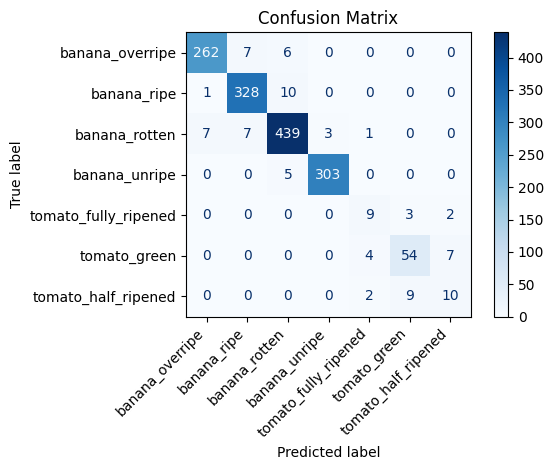

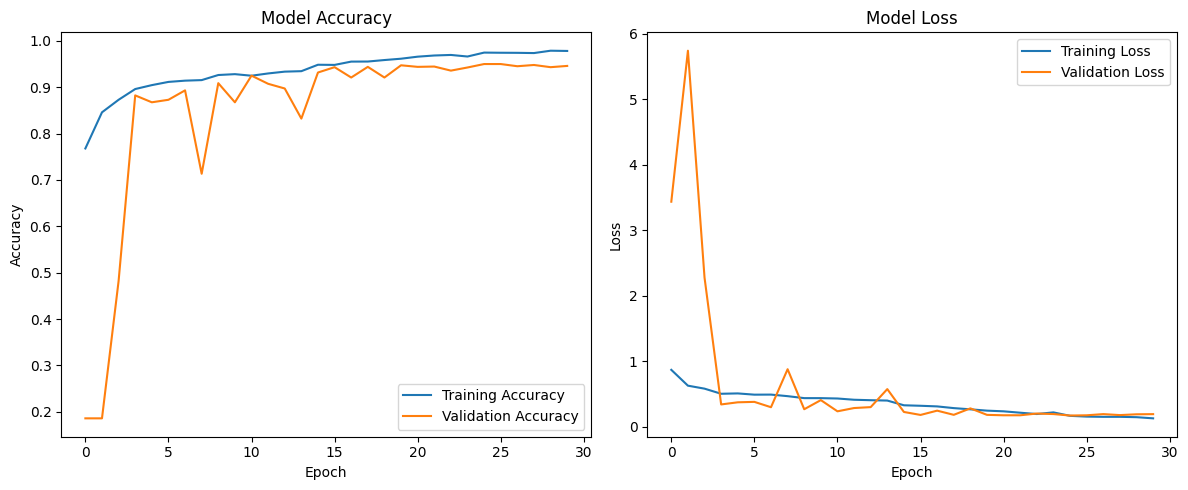

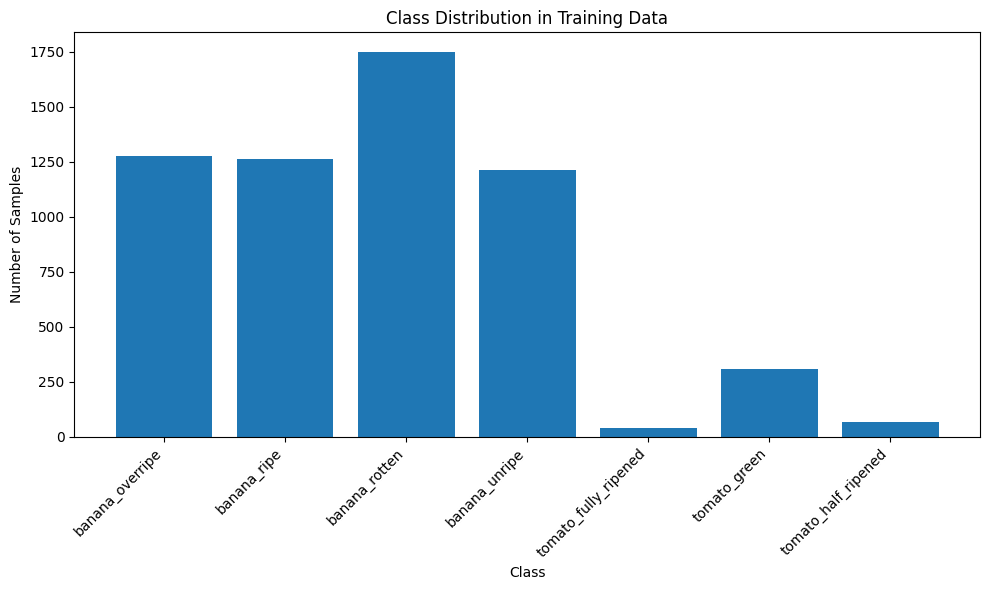

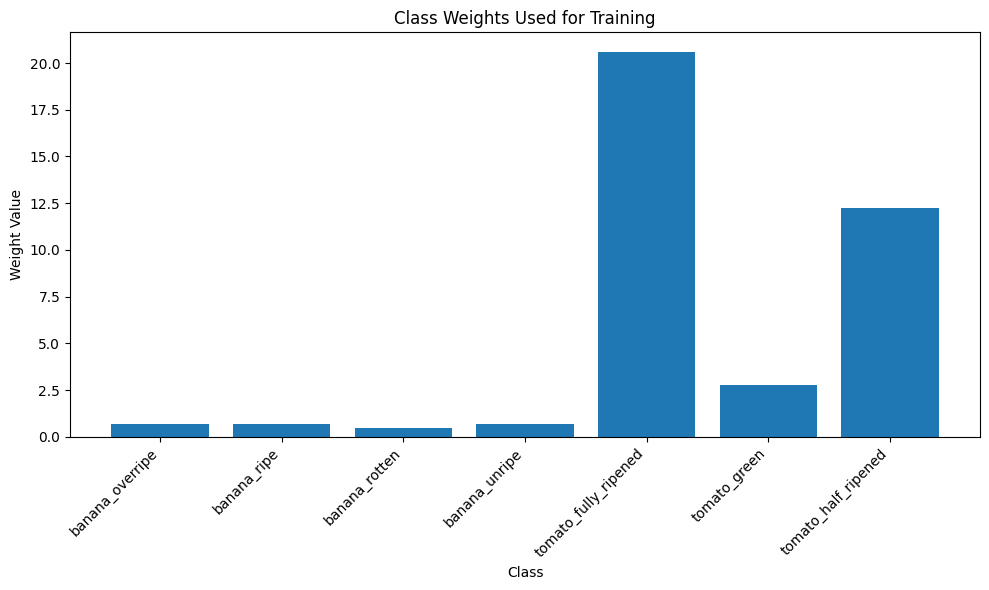

In [ ]:


import tensorflow as tf
from tensorflow.keras import layers, Model, callbacks
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def conv_bn_act(x, filters, kernel_size=3, strides=1):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)
    return x

def mbconv_block(x, filters, expansion=4):
    input_channels = x.shape[-1]
    expanded_channels = input_channels * expansion
    shortcut = x
    x = layers.Conv2D(expanded_channels, 1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)
    x = layers.DepthwiseConv2D(3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)
    x = layers.Conv2D(filters, 1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    if input_channels == filters:
        x = layers.Add()([shortcut, x])
    return x

def relative_attention_block(x, heads=4, key_dim=32):
    x = layers.LayerNormalization()(x)
    x = layers.MultiHeadAttention(num_heads=heads, key_dim=key_dim)(x, x) #prenorm
    x = layers.Dropout(0.1)(x)
    return x

def feedforward_block(x, expansion=4):
    input_dim = x.shape[-1]
    x = layers.LayerNormalization()(x)
    x = layers.Dense(input_dim * expansion, activation='swish')(x)
    x = layers.Dropout(0.2)(x)  # Add dropout here
    x = layers.Dense(input_dim)(x)
    return x


def transformer_block(x, heads=4, key_dim=32):
    attn_output = relative_attention_block(x, heads, key_dim)
    x = layers.Add()([x, attn_output])
    ffn_output = feedforward_block(x)
    x = layers.Add()([x, ffn_output])
    x = layers.Dropout(0.1)(x)
    return x

def build_model(input_shape=(224, 224, 3), num_classes=7):
    inputs = layers.Input(shape=input_shape)
    x = conv_bn_act(inputs, 64, 3, 2)
    x = conv_bn_act(x, 64, 3, 1)
    x = conv_bn_act(x, 128, 3, 2)
    for _ in range(2):
        x = mbconv_block(x, 128)
    x = conv_bn_act(x, 256, 3, 2)
    for _ in range(2):
        x = mbconv_block(x, 256)
    b, h, w, c = x.shape
    x = layers.Reshape((h * w, c))(x)

    for _ in range(4):
        x = transformer_block(x)

    x = layers.LayerNormalization()(x)
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)



batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

data_dir ='/kaggle/input/fine-grained-fruit-quality-assessment/train/train'
img_size = (224, 224)
seed = 42

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int"
)

eval_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int"
)

# Get class names
class_names = train_ds.class_names
print(f"Class names: {class_names}")

# ==== 3. Preprocessing and Augmentation ====

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(0.05, 0.05),
])
def augment(image, label):
    image = data_augmentation(image)
    return image, label

# Extract all labels for class weights
all_labels = []
for _, label in train_ds.unbatch():
    all_labels.append(label.numpy())
all_labels = np.array(all_labels)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)
class_weights_dict = dict(enumerate(class_weights))

# Apply preprocessing
train_ds = train_ds.map(augment, num_parallel_calls=AUTOTUNE)
train_ds = train_ds.map(preprocess, num_parallel_calls=AUTOTUNE).shuffle(1000).prefetch(AUTOTUNE)
eval_ds = eval_ds.map(preprocess, num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)

# ==== 4. Model Training ====

model = build_model(input_shape=(224, 224, 3), num_classes=len(class_weights))
from tensorflow.keras.optimizers import AdamW

optimizer = AdamW(learning_rate=1e-4, weight_decay=1e-5)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

# Add ModelCheckpoint callback to save best weights
checkpoint_filepath = '/kaggle/working/best_model.weights.h5'  # Change path as needed
model_checkpoint = callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',       # Monitor validation accuracy
    mode='max',                   # Save when accuracy is maximized
    save_best_only=True,          # Only save the best model
    save_weights_only=True,       # Save only weights (not entire model)
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6
)

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=eval_ds,
    epochs=50,
    class_weight=class_weights_dict,
    callbacks=[early_stop, reduce_lr, model_checkpoint]  # Add model_checkpoint here
)

# ==== 5. Evaluation ====

# Load the best weights (optional, since EarlyStopping already restores best weights)
model.load_weights(checkpoint_filepath)

train_loss, train_acc = model.evaluate(train_ds, verbose=0)
eval_loss, eval_acc = model.evaluate(eval_ds, verbose=0)

print(f"\nFinal Train Accuracy: {train_acc * 100:.2f}%")
print(f" Final Eval Accuracy: {eval_acc * 100:.2f}%")

# ==== 6. Generate Classification Report and Plots ====

# Function to get predictions and true labels from a dataset
def get_predictions(dataset):
    y_true = []
    y_pred = []
    for images, labels in dataset:
        predictions = model.predict(images, verbose=0)
        predictions = np.argmax(predictions, axis=1)
        y_true.extend(labels.numpy())
        y_pred.extend(predictions)
    return np.array(y_true), np.array(y_pred)

# Get predictions for evaluation dataset
true_labels, pred_labels = get_predictions(eval_ds)

# Print classification report
print("\n===== Classification Report =====")
report = classification_report(true_labels, pred_labels, target_names=class_names)
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# Plot class distribution
plt.figure(figsize=(10, 6))
classes, counts = np.unique(all_labels, return_counts=True)
plt.bar(np.array(class_names), counts)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

# Plot class weights
plt.figure(figsize=(10, 6))
plt.bar(np.array(class_names), class_weights)
plt.title('Class Weights Used for Training')
plt.xlabel('Class')
plt.ylabel('Weight Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('class_weights.png')
plt.show()

In [1]:
%pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached namex-0.0.9-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.15.0-cp312-cp312-win_amd64.whl.metadata (49 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   -----------------------

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from glob import glob

def get_test_filepaths(test_dir):
    return sorted(glob(os.path.join(test_dir, '**', '*.jpg'), recursive=True))

def load_and_preprocess_image(path, img_size=(224, 224)):
    image = tf.io.read_file(path)
    image = tf.image.decode_image(image, channels=3, expand_animations=False)
    image.set_shape([None, None, 3])  # Fix: Set known shape
    image = tf.image.resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    return image

def prepare_test_data(filepaths, img_size=(224, 224), batch_size=32):
    path_ds = tf.data.Dataset.from_tensor_slices(filepaths)
    image_ds = path_ds.map(lambda path: load_and_preprocess_image(path, img_size),
                           num_parallel_calls=tf.data.AUTOTUNE)
    image_ds = image_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return image_ds

def create_submission(model, filepaths, test_ds, output_file='submission.csv'):
    print("Generating predictions...")
    predictions = model.predict(test_ds, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)

    filenames = [os.path.basename(f) for f in filepaths]

    submission_df = pd.DataFrame({
        'ImageID': filenames,
        'Class': predicted_classes
    })

    submission_df = submission_df.sort_values('ImageID')
    submission_df.to_csv(output_file, index=False)
    print(f"✅ Submission saved to {output_file}")
    return submission_df

# === Example Usage ===
test_dir = '/kaggle/input/fine-grained-fruit-quality-assessment/test/testNew'
filepaths = get_test_filepaths(test_dir)
test_ds = prepare_test_data(filepaths)
submission = create_submission(model, filepaths, test_ds)


In [ ]:
def save_file_for_download(file_path):
    import base64
    import IPython.display as display
    
    with open(file_path, 'rb') as f:
        data = f.read()
    
    encoded = base64.b64encode(data).decode()
    
    download_script = f"""
    <script>
    const link = document.createElement('a');
    link.href = 'data:application/octet-stream;base64,{encoded}';
    link.download = '{file_path.split('/')[-1]}';
    link.click();
    </script>
    """
    
    return display.HTML(download_script)

# Use it like this:
save_file_for_download('/kaggle/working/best_model.weights.h5')

In [1]:
%pip install tensorflow

  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl (375.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
  Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached h5py-3.13.0-cp310-cp310-win_amd64.whl (3.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl (7.7 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl (135 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached ml_dtypes-0.5.1-cp310-cp310-win_amd64.whl (209 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Using cached optree-0.15.0-cp310-cp310-win_amd64.whl (297 kB)
  Using cached namex-0.0.9-py3-none-any.whl (5.8 kB)
  Using cached werkzeug-3


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers, Model

# ======== ARCHITECTURE DEFINITION (copied from training) ========

def conv_bn_act(x, filters, kernel_size=3, strides=1):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)
    return x

def mbconv_block(x, filters, expansion=4):
    input_channels = x.shape[-1]
    expanded_channels = input_channels * expansion
    shortcut = x
    x = layers.Conv2D(expanded_channels, 1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)
    x = layers.DepthwiseConv2D(3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('swish')(x)
    x = layers.Conv2D(filters, 1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    if input_channels == filters:
        x = layers.Add()([shortcut, x])
    return x

def relative_attention_block(x, heads=4, key_dim=32):
    x = layers.LayerNormalization()(x)
    x = layers.MultiHeadAttention(num_heads=heads, key_dim=key_dim)(x, x)
    x = layers.Dropout(0.1)(x)
    return x

def feedforward_block(x, expansion=4):
    input_dim = x.shape[-1]
    x = layers.LayerNormalization()(x)
    x = layers.Dense(input_dim * expansion, activation='swish')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(input_dim)(x)
    return x

def transformer_block(x, heads=4, key_dim=32):
    attn_output = relative_attention_block(x, heads, key_dim)
    x = layers.Add()([x, attn_output])
    ffn_output = feedforward_block(x)
    x = layers.Add()([x, ffn_output])
    x = layers.Dropout(0.1)(x)
    return x

def build_model(input_shape=(224, 224, 3), num_classes=7):
    inputs = layers.Input(shape=input_shape)
    x = conv_bn_act(inputs, 64, 3, 2)
    x = conv_bn_act(x, 64, 3, 1)
    x = conv_bn_act(x, 128, 3, 2)
    for _ in range(2):
        x = mbconv_block(x, 128)
    x = conv_bn_act(x, 256, 3, 2)
    for _ in range(2):
        x = mbconv_block(x, 256)
    b, h, w, c = x.shape
    x = layers.Reshape((h * w, c))(x)
    for _ in range(4):
        x = transformer_block(x)
    x = layers.LayerNormalization()(x)
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return Model(inputs, outputs)

# ======== MODEL LOADING ========

model = build_model(input_shape=(224, 224, 3), num_classes=7)
model.load_weights('best_model.weights.h5')  # Path to your saved weights

def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)  # Add batch dimension


test_dir = '../testNew'
image_files = sorted([f for f in os.listdir(test_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])

results = []
for img_name in tqdm(image_files, desc="Predicting"):
    img_path = os.path.join(test_dir, img_name)
    img_tensor = preprocess_image(img_path)
    pred = model.predict(img_tensor, verbose=0)
    predicted_class = np.argmax(pred, axis=1)[0]
    results.append((img_name, predicted_class))

# === Create submission file ===
submission_df = pd.DataFrame(results, columns=["ImageID", "Class"])
submission_df.to_csv("submission.csv", index=False)
submission_df.head()


Predicting: 100%|██████████| 2484/2484 [08:44<00:00,  4.74it/s]


,ImageID,Class
0,testimage_1.jpg,2
1,testimage_10.jpg,0
2,testimage_100.jpg,0
3,testimage_1000.jpg,2
4,testimage_1001.jpg,0
